# Statistiques des diffusions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('datasets/Q_06_latest-2023-2024_RR-T-Vent.csv', sep= ';')
df2 = pd.read_csv('datasets/Q_06_previous-1950-2022_RR-T-Vent.csv', sep = ';')

In [3]:
df1 = df1.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)
df2 = df2.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)

In [15]:
df = pd.concat([df2, df1])
df = df[df['NOM_USUEL'] == 'TENDE_SAPC']
df.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)

df['date'] = pd.to_datetime(df['AAAAMMJJ'], format='%Y%m%d')
df.set_index('date', inplace=True)
df.drop('AAAAMMJJ', axis = 1)

df['TX'].head()

date
1989-07-21    27.0
1989-07-22    27.0
1989-07-23    27.8
1989-07-24    27.2
1989-07-25    29.3
Name: TX, dtype: float64

### Préambule
Par définition un processus de diffusion est un processus de Markov fort à trajectoires continues. Dans ce cas ces processus sont solutions de l'équation : $$ d X_{t}=b\left(\theta,t,X_{t}\right)+ \sigma(\theta, t, X_{t})\,dW_{t}$$

où $W$ est une mouvement brownien standard.
Ils permettent de modéliser des phénomènes qui se diffusent dans le temps, en fonctions de fluctuations aléatoires. Dans notre cas nous allons appliquer ces modèles statistiques à nos odnnées sur la température.

L'idée sous jacente est que notre processus, ici noté $X(t)$ et qui représente la température est à la fois conséquence d'un phénomène déterministe (la température précédente, des saisons, des mois) et d'une phénomène stochastique (les aléas du climat), que l'on va représenter par un mouvement brownien. 

Dans notre étude on se restreindra aux modèles de diffusion stationnaire ($\sigma$ ne dépend pas du temps) et l'on va chercher à estimer le paramètre $\theta$ inconnu.

### Modèles 

##### Processus d’Ornstein-Uhlenbeck
Une première modélisation assez simple consiste à utiliser $ b(\theta, t, X_{t}) = \theta_0 \, X_t dt$ et $\sigma(\theta, t, X_{t}) = \sigma_{0} >0 $ de chercher à estimer $\theta = \left\{ \theta_0, \sigma_0 \right\}$ dans ce cas. On a donc le modèle suivant : 
$$ d X_t = \theta_0 \, X_t dt + \sigma_0 dW_t$$


* estimation par maximum de vraisemblance : Avec une estimation des paramètres par maximum de vraisemblances on obtient les résultats suivants : $\theta_0 \approx 0.01$ et $\sigma_0 \approx 0.31$. Et si l'on simule des processus semblables à celui-ci, een testant avec des valeurs différentes de $\theta_0$ et $\sigma_0$ différentes, l'on s'aperçoit que nos estimations sont plutôt correctes. Les simulations avec d'autres paramètres semblent plus éloignées des données réelles relativement à nos simulations. Pour autant l'on voit que le modèle reste très limité pour modéliser ce processus.

##### Modélisation par Mouvement brownien géométrique:

Un autre processus de diffusion permettant de modéliser nos données est le suivant : 
$$dX_t = \mu X_t \: dt + \sigma X_t \: dW_t$$.

Il s'agit ici d'un mouvement brownien géométrique. 
* estimation par maximum de vraisemblance : Avec une estimation des paramètres par maximum de vraisemblances on obtient les résultats suivants : $\mu \approx 17,9$ et $\sigma \approx 2.7$. Ces valeurs semblent beaucoup trop importantes et le processus explose. Nous ne pouvons pas simuler de processus avec ces valeurs. Cette modélisation ne semble donc pas adapter à notre données météo.



##### Limites des modèles de diffusions


L'utilisation de modèles de diffusion à temps continu présente des limites lorsqu'ils sont appliqués à des relevés de température journaliers. La principale limite réside dans le fait que ces modèles supposent un suivi continu dans le temps, ce qui peut ne pas correspondre à la réalité des relevés de température, qui sont généralement enregistrés quotidiennement. Cette résolution temporelle plus grossière peut entraîner une perte de précision dans la représentation des variations de température à des échelles de temps plus fines, telles que les fluctuations horaires ou saisonnières.

Ainsi les modèles ARIMA semblent plus pertinents que les modèles de diffusion pour notre jeu de données car ils permettent de relever les effets de saisonalité et les tendances. 

Nos modèles de diffusion, bien que conçus pour des données comme la température pourraient être appropriés dans le cas d'un suivi très précis de la température, à la minute par exemple, dans le cas où l'équation de la chaleur modélise bien la situation. Dans le cas d'une analyse météo ils semblent limités et nous avons eu du mal à obtenir des résultats pertinents avec.





In [84]:
from ouparams import ouparams

df_numpy = df['TX'].to_numpy()
mu, sigma, theta = ouparams.find(df_numpy)
print(mu, sigma, theta)



17.8574303254762 2.7247789059956986 0.06874232683157218


In [85]:
def simulate_ou_process(mu, sigma, theta, dt=0.01, N=1):
    # Initialize the process array
    X = np.zeros(N)
    # Generate random numbers for the Wiener process
    dW = np.sqrt(dt) * norm.rvs(size=N)
    # Simulate the process
    for t in range(1, N):
        X[t] = X[t-1] + theta*(mu - X[t-1])*dt + sigma*dW[t]
    return X

# Number of data points

# Simulate the process
ou_process = simulate_ou_process(mu, sigma, theta, dt=0.01, N=len(df.index))

12313
12313


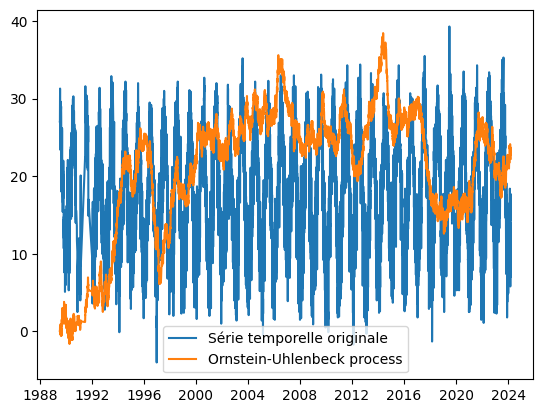

In [86]:
import matplotlib.pyplot as plt

# Simulate the process
print(len(ou_process))
print(len(df.index))

# Create a new figure
plt.figure()

# Plot the original time series
plt.plot(df.index, df['TX'], label='Série temporelle originale')

# Plot the simulated Ornstein-Uhlenbeck process
plt.plot(df.index[:len(ou_process)], ou_process, label='Ornstein-Uhlenbeck process')

# Add a legend
plt.legend()

# Show the plot
plt.show()

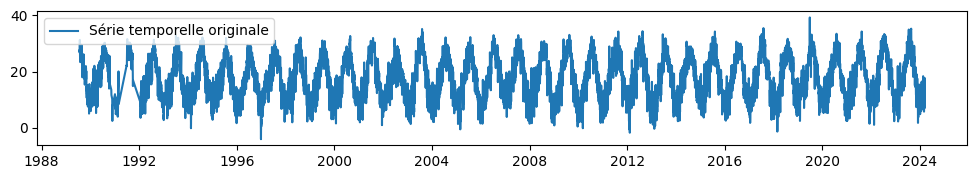

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['TX'], label='Série temporelle originale')
plt.legend(loc='upper left')
plt.show()

In [24]:
XX = X_1[:-1]
YY = X_1[1:]
beta, alpha, _, _, _ = ss.linregress(XX, YY)  # OLS
kappa_ols = -np.log(beta) / dt
theta_ols = alpha / (1 - beta)
res = YY - beta * XX - alpha  # residuals
std_resid = np.std(res, ddof=2)
sig_ols = std_resid * np.sqrt(2 * kappa_ols / (1 - beta**2))

print("OLS theta = ", theta_ols)
print("OLS kappa = ", kappa_ols)
print("OLS sigma = ", sig_ols)

12313

In [43]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the likelihood function
def neg_log_likelihood(params, data):
    theta0, sigma0 = params
    X = data['TX'].values
    dt = (data.index[1:] - data.index[:-1]).total_seconds()  # Convert timedelta to seconds
    n = len(data)
    sum_sq_diff = np.sum((X[1:] - theta0 * X[:-1] * dt) ** 2)
    dt_mean = np.mean(dt)
    log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma0**2 * dt_mean) - 0.5 * sum_sq_diff / (sigma0**2 * dt_mean)
    return -log_likelihood

# Optimization
def estimate_parameters(data):
    result = minimize(neg_log_likelihood, x0=[0.5, 0.5], args=(data,), bounds=((None, None), (0.0, None)))
    theta0, sigma0 = result.x
    return theta0, sigma0

# Load your real data into a pandas DataFrame
# Assuming you have a DataFrame named 'df' with a column 'TX' containing the temperature values
# Make sure your DataFrame has a datetime index

# Estimate parameters
theta0_est, sigma0_est = estimate_parameters(df)

print("Estimated theta0:", theta0_est)
print("Estimated sigma0:", sigma0_est)


Estimated theta0: 2.202080060231959e-05
Estimated sigma0: 0.31342771926937907


/tmp/ipykernel_15103/2995943836.py:13: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma0**2 * dt_mean) - 0.5 * sum_sq_diff / (sigma0**2 * dt_mean)
/tmp/ipykernel_15103/2995943836.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma0**2 * dt_mean) - 0.5 * sum_sq_diff / (sigma0**2 * dt_mean)
/tmp/ipykernel_15103/2995943836.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma0**2 * dt_mean) - 0.5 * sum_sq_diff / (sigma0**2 * dt_mean)


In [47]:
def calculate_theta0(data):
    # Compute numerator: sum of X_{t_{i}-1} * X_{t_{i}}
    numerator = np.sum(data[1:] * data[:-1])
    
    # Compute denominator: sum of X_{t_{i-1}}^2
    denominator = np.sum(data[:-1] ** 2)
    
    # Compute theta0_hat using the formula
    theta0_hat = np.log(numerator / denominator)
    
    return theta0_hat

# Example usage:
# Assuming data is a numpy array containing temperature values for each day
# Replace 'df['TX'].values' with your actual temperature data
theta0_hat = calculate_theta0(df['TX'].values)
print("Estimated theta0:", theta0_hat)

Estimated theta0: -0.009707441233859512


In [48]:
def calculate_sigma0_squared(data, theta_hat):
    # Compute the variance of the process
    variance = np.var(data[1:] - np.exp(theta_hat) * data[:-1])
    
    # Compute the number of observations
    n = len(data)
    
    # Compute sigma0_hat_squared using the formula
    sigma0_hat_squared = (1 / (n * variance)) * np.sum((data[1:] - np.exp(theta_hat) * data[:-1]) ** 2)
    
    return sigma0_hat_squared

# Example usage:
# Assuming data is a numpy array containing temperature values for each day
# Replace 'df['TX'].values' with your actual temperature data
# theta0_hat should be the previously calculated theta_hat
sigma0_hat_squared = calculate_sigma0_squared(df['TX'].values, theta0_hat)
print("Estimated sigma0:",  np.sqrt(sigma0_hat_squared))

Estimated sigma0: 1.0020300905356847


/tmp/ipykernel_15103/269709054.py:13: RuntimeWarning: overflow encountered in scalar add
  X[i] = X[i-1] + dX
/users/eleves-b/2021/valentin.dorseuil/Desktop/Rosembaum/venv/lib64/python3.9/site-packages/matplotlib/axes/_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


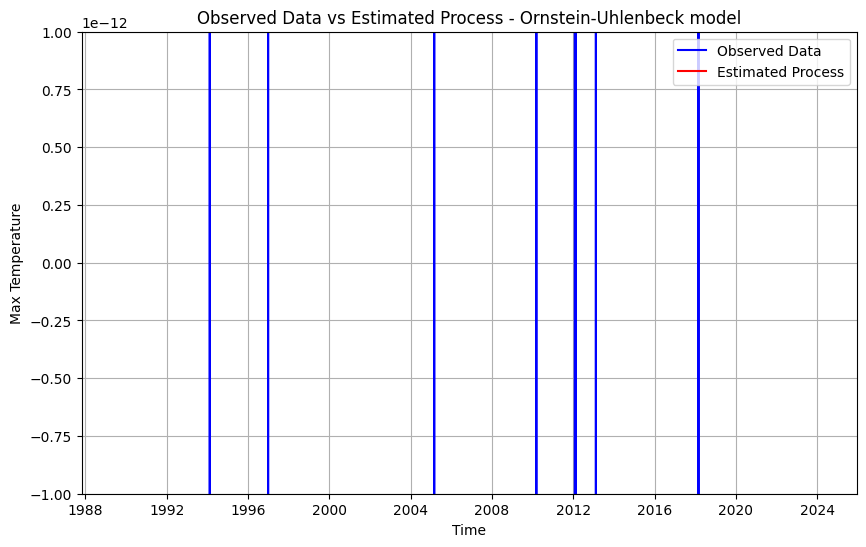

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to simulate the stochastic process
def simulate_process(data, theta0, sigma0):
    dt_days = 1  # Assuming dt is exactly 1 day
    X = np.zeros(len(data))
    X[0] = data.iloc[0]
    for i in range(1, len(data)):
        dW = np.sqrt(dt_days) * np.random.randn()
        dX = theta0 * X[i-1] * dt_days + sigma0 * dW
        X[i] = X[i-1] + dX
    return X

# Simulate the process using estimated parameters
X_estimated = simulate_process(df['TX'], 0.1, 0.1)

# Plot the observed data and the estimated process
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TX'], label='Observed Data', color='blue')
plt.plot(df.index, X_estimated, label='Estimated Process', color='red')
plt.xlabel('Time')
plt.ylabel('Max Temperature')
plt.title('Observed Data vs Estimated Process - Ornstein-Uhlenbeck model')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
import numpy as np
from scipy.optimize import minimize

def ornstein_uhlenbeck_simulation(theta, sigma, data):
    dt = 1  # Assuming dt is 1 day
    X = np.zeros(len(data))
    X[0] = data[0]
    for i in range(1, len(data)):
        dW = np.sqrt(dt) * np.random.randn()
        dX = theta * (data[i-1] - X[i-1]) * dt + sigma * dW
        X[i] = X[i-1] + dX
    return X

def mse(params, data):
    theta, sigma = params
    simulated_data = ornstein_uhlenbeck_simulation(theta, sigma, data)
    mse = np.mean((data - simulated_data) ** 2)
    return mse

def estimate_ou_parameters_mse(data):
    result = minimize(mse, x0=[0.1, 0.2], args=(data,), bounds=((None, None), (0.0, None)))
    theta, sigma = result.x
    return theta, sigma

# Example usage:
# Assuming df['TX'] contains your temperature data
theta_hat_mse, sigma_hat_mse = estimate_ou_parameters_mse(df['TX'].values)
print("Estimated theta (MSE):", theta_hat_mse)
print("Estimated sigma (MSE):", sigma_hat_mse)


Estimated theta (MSE): 0.1
Estimated sigma (MSE): 0.2


/tmp/ipykernel_15103/3832403460.py:11: RuntimeWarning: overflow encountered in scalar add
  X[i] = X[i-1] + dX
/tmp/ipykernel_15103/3832403460.py:17: RuntimeWarning: overflow encountered in square
  mse = np.mean((data - simulated_data) ** 2)
/users/eleves-b/2021/valentin.dorseuil/Desktop/Rosembaum/venv/lib64/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


$\hat{\theta}=\frac{1}{\Delta}\log\left(\frac{\sum_{i=1}^{n}X_{t_{i}-1}X_{t_{i}}}{\sum_{i=1}^{n}X_{t_{i-1}}^{2}}\right)$

- Saisonnalité annuelle + semestrielle
- Tendance à la hausse vérifiée mais... irrégulière
- Dispersion saisonnière : dispersion plus élevée en hiver et asymétrie des températures hivernales
- Prédicteur le plus pertinent pour prévoir la température en un lieu donné ? La température de la veille ou les températures des 3 jours récédents

## Différents modèles pour la modélisation de la température

Modèle d'Ornstein-Uhlenbeck : 
$$ d T_{t}=\alpha_{t}\left(\theta_{t}-T_{t}\right)d t+\sigma_{t}d W_{t}
$$

Modèle de Dornier :
$$ dT_{t}=\left\{{\frac{d\theta_{t}}{d t}}+\alpha\left(\theta_{t}-T_{t}\right)\right\}d t+\sigma_{t}d W_{t} $$
Modèle à mémoire longue (Ornstein-Uhlenbeck fractionnaire):
$$ d T_{t}=\alpha\left(\theta_{t}-T_{t}\right)d t+\sigma_{t}d W_{t}^H
$$
Avec MB fractionnaire, pas gaussien et continu tel que : $E[ W_{t}^{H}{ W}_{s}^{H}] = \frac{1}{2}(t^{2H} +s^{2H}-\vert t-s \vert^{2H})$


Modèle à mémoire longue : ARFIMA
$$ \Phi(B)(1-B)^{d}X_t=\Theta(B)\varepsilon_{t},\: 0<d<\frac{1}{2}$$ 

$$ dT_{t}=\left\{{\frac{d\theta_{t}}{d t}}+\alpha\left(\theta_{t}-T_{t}\right)\right\}d t+\sigma_{t}d W_{t} $$

https://core.ac.uk/download/pdf/52622984.pdf

## Estimation par maximum de Vraisemblance

## Estimation par minimum de contraste

## Méthodes empiriques

$dX_t = \mu X_t \: dt + \sigma X_t \: dW_t$

17.8574303254762 2.7247789059956986
27.0
[2.70000000e+01 2.95449590e+01 3.00814136e+01 3.03464949e+01
 3.34375262e+01 3.59763392e+01 3.78434993e+01 4.20634403e+01
 4.80469722e+01 5.54796596e+01 6.02889539e+01 6.64140500e+01
 6.99365259e+01 7.72222533e+01 8.64152744e+01 9.60463587e+01
 1.06175122e+02 1.20484009e+02 1.21090303e+02 1.30717923e+02
 1.47972224e+02 1.66557940e+02 1.80590550e+02 1.95868163e+02
 2.12373564e+02 2.27518801e+02 2.43724782e+02 2.69217978e+02
 2.77955076e+02 2.95902670e+02 3.22530160e+02 3.60978411e+02
 4.13173140e+02 4.53062389e+02 4.98787744e+02 5.74756298e+02
 6.15243636e+02 7.03063327e+02 7.52388431e+02 7.92956838e+02
 9.35427103e+02 1.01665495e+03 1.14269158e+03 1.27067193e+03
 1.29291202e+03 1.38533145e+03 1.61003636e+03 1.69255297e+03
 1.98322018e+03 1.99145285e+03 2.17555894e+03 2.41634727e+03
 2.65916174e+03 3.05376289e+03 3.37175661e+03 3.86594318e+03
 4.57068854e+03 4.85713543e+03 5.45139695e+03 6.01063426e+03
 6.18725241e+03 6.55676464e+03 7.50123550e+0

/tmp/ipykernel_15103/1383163967.py:20: RuntimeWarning: overflow encountered in scalar add
  X[i] = X[i-1] + drift(mu, X[i-1]) * dt + volatility(sigma, X[i-1]) * dW
/tmp/ipykernel_15103/1383163967.py:20: RuntimeWarning: invalid value encountered in scalar add
  X[i] = X[i-1] + drift(mu, X[i-1]) * dt + volatility(sigma, X[i-1]) * dW
/users/eleves-b/2021/valentin.dorseuil/Desktop/Rosembaum/venv/lib64/python3.9/site-packages/matplotlib/axes/_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


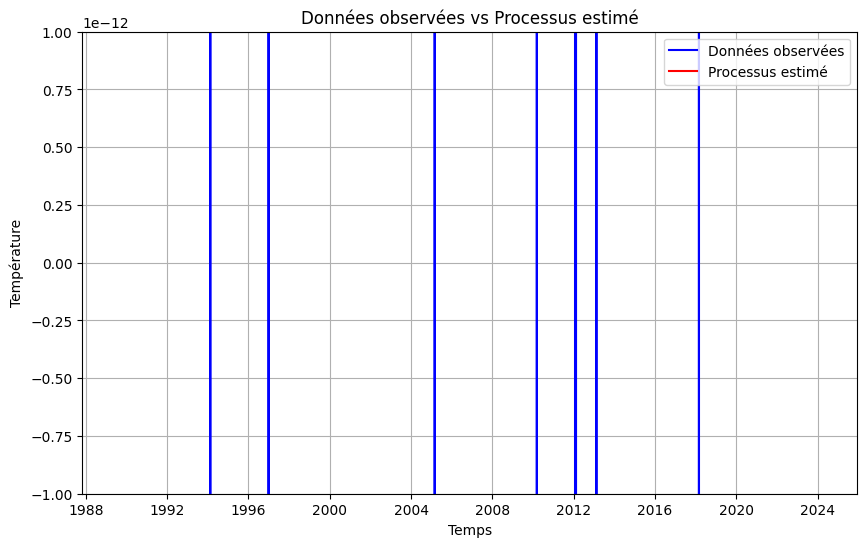

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Fonction de dérivation pour le GBM
def drift(mu, X):
    return mu * X

# Fonction de volatilité pour le GBM
def volatility(sigma, X):
    return sigma * X

# Modèle de mouvement brownien géométrique
def geometric_brownian_motion(mu, sigma, X0, dt, n):
    X = np.zeros(n)
    X[0] = X0
    for i in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + drift(mu, X[i-1]) * dt + volatility(sigma, X[i-1]) * dW
    return X

# Log-vraisemblance pour l'estimation des paramètres
def log_likelihood(params, data):
    mu, sigma = params
    dt = 1  # Supposons que les relevés sont quotidiens
    n = len(data)
    sum_sq_diff = np.sum((data[1:] - drift(mu, data[:-1]) * dt) ** 2)
    log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma**2 * dt) - 0.5 * sum_sq_diff / (sigma**2 * dt)
    return -log_likelihood

def neg_log_likelihood(params, data):
    theta0, sigma0 = params
    X = data['TX'].values
    dt = (data.index[1:] - data.index[:-1]).total_seconds()  # Convert timedelta to seconds
    n = len(data)
    sum_sq_diff = np.sum((X[1:] - theta0 * X[:-1] * dt) ** 2)
    dt_mean = np.mean(dt)
    log_likelihood = -0.5 * (n-1) * np.log(2 * np.pi * sigma0**2 * dt_mean) - 0.5 * sum_sq_diff / (sigma0**2 * dt_mean)
    return -log_likelihood

# Estimation des paramètres du GBM
def estimate_gbm_parameters(data):
    result = minimize(log_likelihood, x0=[0.01, 0.01], args=(data,), bounds=((None, None), (0.0, None)))
    mu, sigma = result.x
    return mu, sigma

print(mu, sigma)

# Chargement des données
# Assumons que vous avez un DataFrame 'df' avec une colonne 'TX' contenant les données de température
# Assurez-vous que l'index du DataFrame est une date
# Remplacez 'df['TX']' par vos vraies données de température

# Estimation des paramètres du GBM
mu_hat, sigma_hat = estimate_gbm_parameters(df['TX'].values)

# Simulation du processus GBM avec les paramètres estimés
n_simulations = len(df)
print(df['TX'].iloc[0])
X_simulated = geometric_brownian_motion(0.1, 0.05, df['TX'].iloc[0], 1, n_simulations)
print(X_simulated[:100])
# Tracé des données observées et du processus simulé
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TX'], label='Données observées', color='blue')
plt.plot(df.index, X_simulated, label='Processus estimé', color='red')
plt.xlabel('Temps')
plt.ylabel('Température')
plt.title('Données observées vs Processus estimé')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Function for drift in GBM model
def drift(mu, X):
    return mu * X

# Function for volatility in GBM model
def volatility(sigma, X):
    return sigma * X

# Geometric Brownian Motion (GBM) model
def geometric_brownian_motion(mu, sigma, X0, dt, n):
    X = np.zeros(n)
    X[0] = X0
    for i in range(1, n):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + drift(mu, X[i-1]) * dt + volatility(sigma, X[i-1]) * dW
    return X

# Residuals function for least squares
def residuals(params, data):
    mu, sigma = params
    dt = 1  # Assuming daily observations
    n = len(data)
    X_simulated = geometric_brownian_motion(mu, sigma, data[0], dt, n)
    return X_simulated - data

# Load data
# Assuming you have a DataFrame 'df' with a column 'TX' containing temperature data
# Make sure your DataFrame has a datetime index
# Replace 'df['TX']' with your actual temperature data

# Define parameter bounds for optimization
bounds = ((-0.5, 0.5), (0.01, None))  # Example bounds for mu (-0.5 to 0.5) and sigma (0.01 to positive infinity)

# Estimate parameters using least squares with bounds
result = least_squares(residuals, x0=[0.0, 0.1], args=(df['TX'].values,), bounds=bounds)
mu_hat_ls, sigma_hat_ls = result.x

# Display estimated parameters
print("Estimated parameters (Least Squares with Bounds):")
print("Mu =", mu_hat_ls)
print("Sigma =", sigma_hat_ls)


ValueError: `x0` is infeasible.